In [ ]:
import pandas as pd
from gnb import GNB

train_filepath = 'data/iris_train_set.csv'
test_filepath = 'data/iris_test_set.csv'

train_data = pd.read_csv(train_filepath)
test_data = pd.read_csv(test_filepath)



In [ ]:
ytrain = train_data['iris_type']
Xtrain = train_data.drop(['iris_type'], axis=1)
ytest = test_data['iris_type']
Xtest = test_data.drop(['iris_type'], axis=1)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

In [ ]:
gnb = GNB()

In [ ]:
gnb.fit(Xtrain, ytrain)

In [ ]:
ypred = gnb.predict(Xtest)

In [ ]:
gnb.calc_accuracy(ypred, ytest)

In [ ]:
from knn import KNN
knn = KNN(3,'euclidean','t-disribution')

In [ ]:
knn.fit(Xtrain, ytrain)

In [ ]:
pred = knn.predict(Xtest)

In [ ]:
knn.calc_accuracy(ypred, ytest)

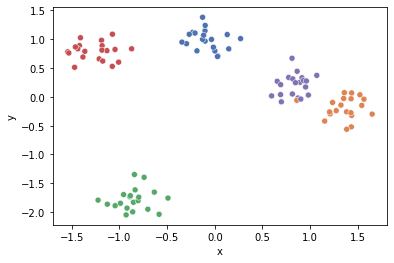

In [1]:
from kmeans import KMeans
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = 5

X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [2]:
kmeans = KMeans(n_clusters=centers, init='kmeans++')
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate()
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.show()

c:\Users\matan\Documents\GitHub\Gaussian-Naive-Baise\kmeans.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.not_equal(self.centroids, self.prev_centroids).any()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()